# Start Here

In [1]:
from pandas import HDFStore,DataFrame
import pandas as pd
store = HDFStore('/home/raz/store.h5')

pdata = pd.read_hdf(store)
pdata = pdata.sort_values('Timestamp')

catFeatures = []
NumFeatures = []
for col,x in pdata.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        NumFeatures.append(col)
    else:
        catFeatures.append(col)
print(len(NumFeatures), "Continuous Features \n", NumFeatures)
print("\n \n")
print(len(catFeatures), "Categorical features \n\n\n", catFeatures)


NumFeatures.remove("Timestamp")
print("\n \n")

print(len(NumFeatures), "Upadated List of Continuous Features \n", NumFeatures)
print("\n \n")

Opening /home/raz/store.h5 in read-only mode
52 Continuous Features 
 ['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603']

 

1 Categorical features 


 ['EVENT']

 

51 Upadated List of Continuous Features 
 ['FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT50

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
pd.options.mode.chained_assignment = None  

#### Is the distribution even? Lets explore time in depth.

### Visualize target variable, with barplots

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


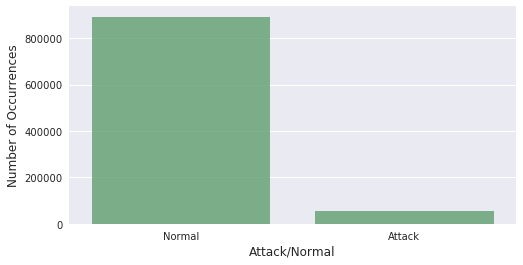

In [3]:
attacks = pdata['EVENT'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(attacks.index, attacks.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Attack/Normal', fontsize=12)
plt.show()

## Distribution By Days

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


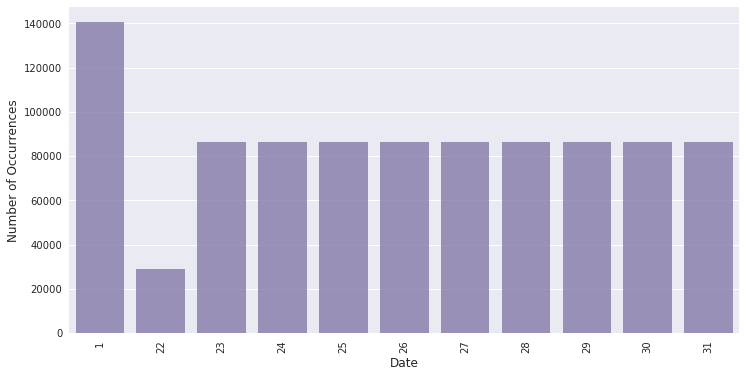

In [4]:
day = pdata['Timestamp'].dt.day

cnt_srs = day.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

In [5]:
pdata[pdata['Timestamp'].dt.day == 1] 

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,EVENT
309519,2016-01-01 00:00:00,0.000000,812.2573,1,1,1,193.6683,8.657588,303.8195,0.000000,...,2,1,251.7143,0.784929,189.5027,0.0,1,1,1,Normal
309520,2016-01-01 00:00:01,0.000000,812.0610,1,1,1,193.6683,8.661113,303.8195,0.000000,...,2,1,251.7143,0.784929,189.5027,0.0,1,1,1,Normal
309521,2016-01-01 00:00:02,0.000000,812.1788,1,1,1,193.8926,8.661113,303.8195,0.000000,...,2,1,251.7143,0.784929,189.5027,0.0,1,1,1,Normal
309522,2016-01-01 00:00:03,0.000000,812.0218,1,1,1,194.2130,8.661113,303.8195,0.000000,...,2,1,251.7143,0.784929,189.5027,0.0,1,1,1,Normal
309523,2016-01-01 00:00:04,0.000000,812.1788,1,1,1,194.2130,8.661113,303.8195,0.000000,...,2,1,251.7143,0.784929,189.5027,0.0,1,1,1,Normal
309524,2016-01-01 00:00:05,0.000000,812.2573,1,1,1,194.2130,8.661113,303.8195,0.000000,...,2,1,251.7143,0.784929,189.5027,0.0,1,1,1,Normal
309525,2016-01-01 00:00:06,0.000000,812.3751,1,1,1,194.2130,8.661113,303.8195,0.000000,...,2,1,251.7143,0.784929,189.5027,0.0,1,1,1,Normal
309526,2016-01-01 00:00:07,0.000000,812.0610,1,1,1,194.2130,8.661113,303.8195,0.000000,...,2,1,251.7143,0.784929,189.5027,0.0,1,1,1,Normal
309527,2016-01-01 00:00:08,0.000000,812.3751,1,1,1,194.2130,8.661113,303.8195,0.000000,...,2,1,251.7143,0.784929,189.5988,0.0,1,1,1,Normal
309528,2016-01-01 00:00:09,0.000000,812.5321,1,1,1,194.5334,8.661113,303.8195,0.000000,...,2,1,251.7143,0.784929,189.6469,0.0,1,1,1,Normal


#### First day was the least active while the last day was most active.

## Distribution By Hour

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


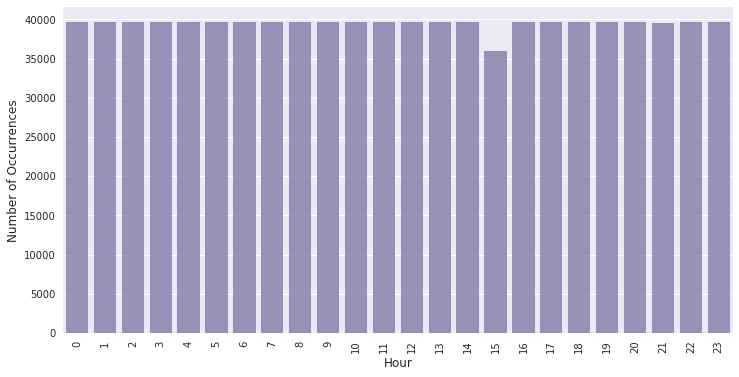

In [6]:
hours = pdata['Timestamp'].dt.hour

cnt_srs = hours.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

#### There is a significant drop at 3pm.

In [7]:
bool_cols = [col for col in pdata 
             if pdata[[col]].dropna().isin([0, 1]).all().values]

In [8]:
pdata[bool_cols].describe()

,P202,P401,P404,P502,P601,P603
count,946719.0,946719.0,946719.0,946719.0,946719.0,946719.0
mean,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0


#### Strange. All of these columns have same value for throughout the dataset. We can certainly drop these columns from our dataset.

In [9]:
pdata.drop(bool_cols, axis = 1, inplace = True)
catFeatures = []
NumFeatures = []
for col,x in pdata.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        NumFeatures.append(col)
    else:
        catFeatures.append(col)

In [10]:
catFeatures = []
for col in pdata[NumFeatures]:
    if(pdata[[col]].dropna().isin([1, 2]).all().values):
        print(col)
        catFeatures.append(col)
        pdata[col] = pdata[col].astype('category')

P101
P102
P201
P203
P204
P205
P206
P301
P302
P402
P403
UV401
P501
P602


In [11]:
NumFeatures = [x for x in NumFeatures if x not in catFeatures ]
len(NumFeatures) + len(catFeatures) + len(bool_cols)

52

# Statistics for the data
### Mean, Median snd Std. dev. etc.

In [12]:
pdata[NumFeatures].describe()

,FIT101,LIT101,MV101,AIT201,AIT202,AIT203,FIT201,MV201,DPIT301,FIT301,...,AIT503,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601
count,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,...,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000
mean,1.782889,596.041402,1.693162,238.341348,8.454710,334.957608,1.768831,1.719197,16.212524,1.775459,...,265.880281,13.427842,1.658442,1.233526,0.707877,0.295526,242.015200,1.102465,182.878164,0.015417
std,1.164297,125.001581,0.470804,36.220978,0.124405,40.096568,1.097019,0.457877,7.254261,0.867696,...,5.977529,8.725355,0.326799,0.243721,0.140179,0.059783,45.864317,0.335920,35.416443,0.153964
min,0.000000,120.623700,0.000000,168.033800,6.000000,285.337100,0.000000,0.000000,0.000000,0.000000,...,244.873100,7.344271,0.000000,0.000000,0.000000,0.000000,8.891951,0.000000,3.108177,0.000000
25%,0.000000,508.990500,1.000000,198.218400,8.363433,318.559400,0.000000,1.000000,19.505090,2.196714,...,261.567500,11.650860,1.713535,1.264634,0.732324,0.306569,248.702300,0.961138,187.355800,0.000000
50%,2.484707,527.400100,2.000000,258.619600,8.411177,329.248900,2.444879,2.000000,19.854020,2.208372,...,266.662400,12.458340,1.723661,1.281798,0.734885,0.306889,250.640900,1.089290,189.166200,0.000064
75%,2.585594,702.899100,2.000000,265.540900,8.553127,333.529900,2.452696,2.000000,20.042900,2.214649,...,269.898700,14.573190,1.731735,1.293967,0.739366,0.308426,253.268400,1.265498,192.210300,0.000128
max,2.760145,1000.000000,2.000000,272.526300,8.988273,567.469900,2.826899,2.000000,45.000000,2.376197,...,297.263500,442.463500,1.757754,1.361983,0.763691,0.317010,264.643700,3.668343,200.637600,1.802710


In [13]:
pdata[catFeatures].describe()

,P101,P102,P201,P203,P204,P205,P206,P301,P302,P402,P403,UV401,P501,P602
count,946719,946719,946719,946719,946719,946719,946719,946719,946719,946719,946719,946719,946719,946719
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,2,1,1,2,1,2,1,1,2,2,1,2,2,1
freq,682947,943594,892248,680851,946663,638635,946664,944748,755273,911495,946659,910166,910025,938693


## Now that we have variables in order, lets find out what categorical variables are only significant during attacks?

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


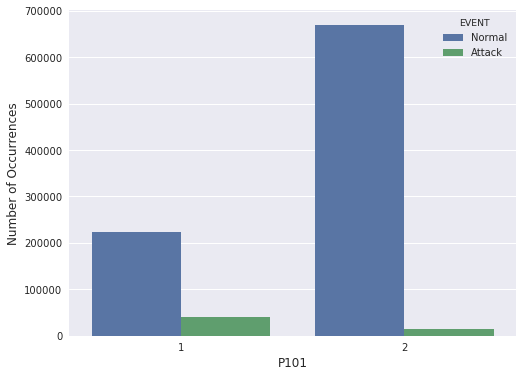

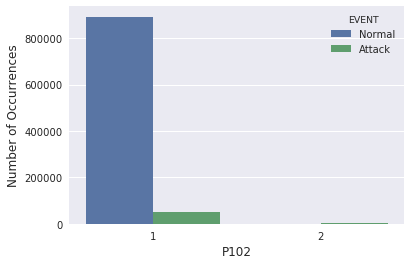

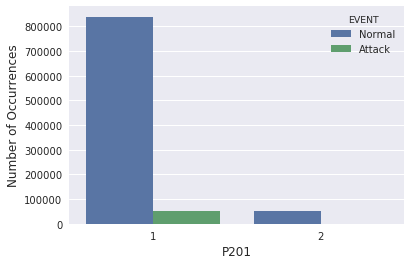

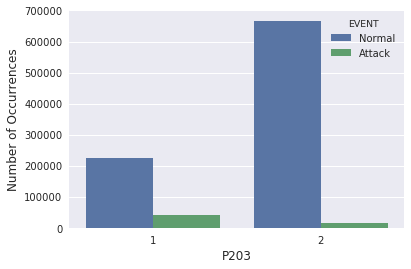

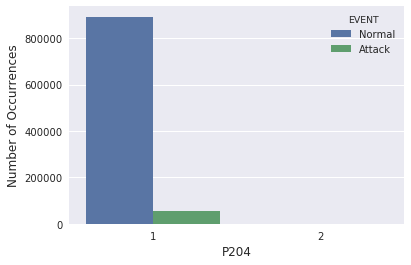

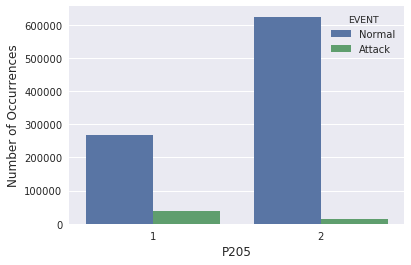

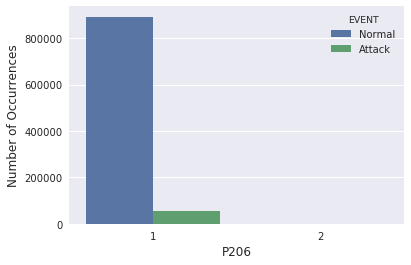

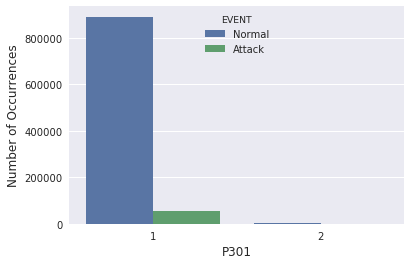

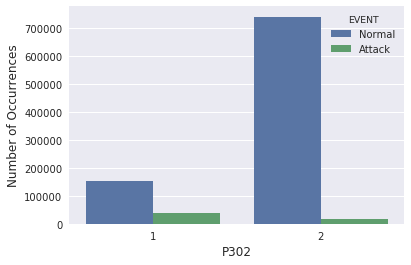

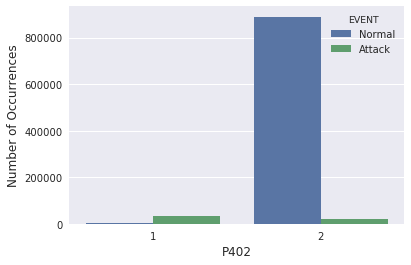

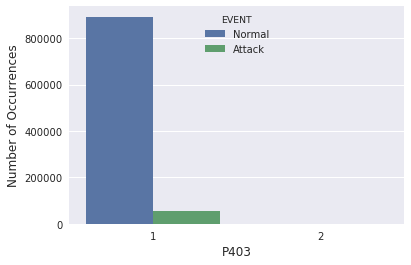

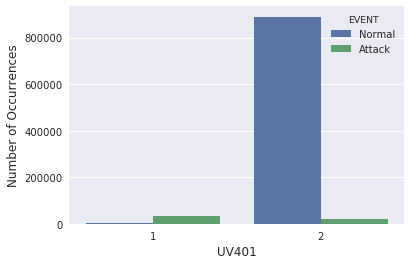

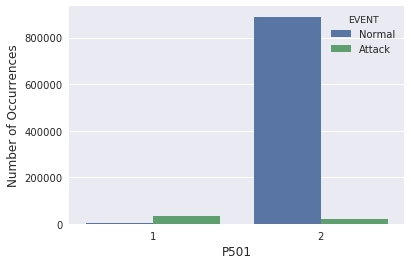

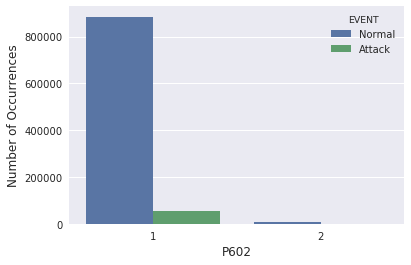

In [14]:
plt.figure(figsize=(8,6))
for i in catFeatures:
    sns.countplot(x=i, hue='EVENT', data=pdata)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(i, fontsize=12)
    plt.show()

#### Notice P402, UV401, P501? one of their values is directly related to the attacks.

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


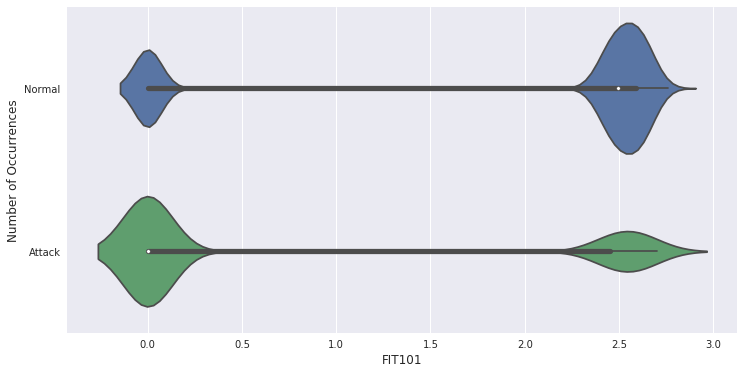

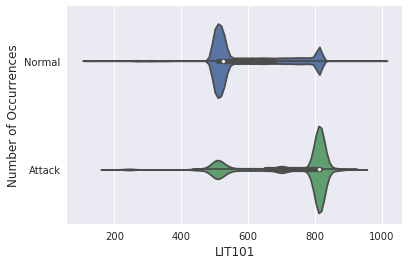

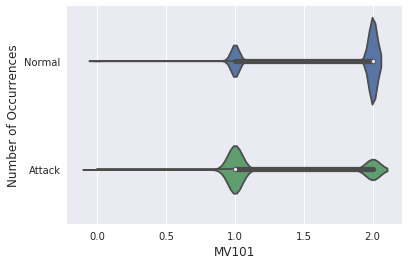

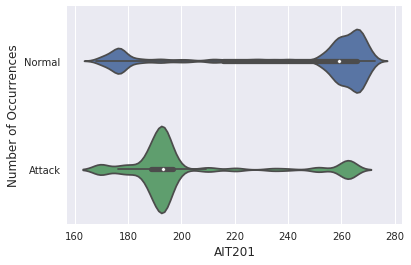

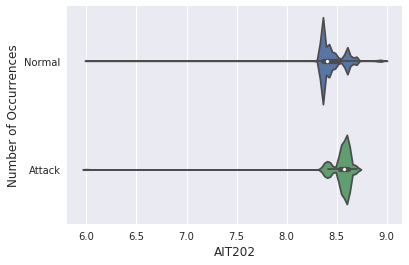

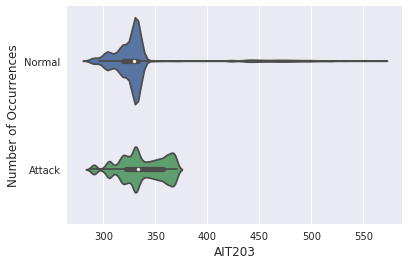

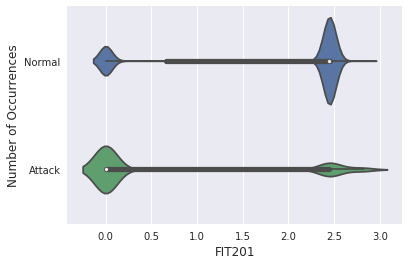

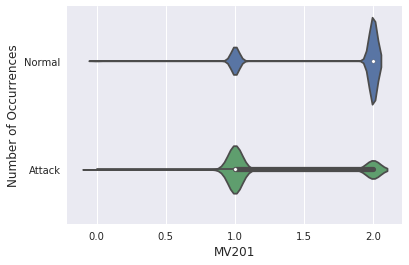

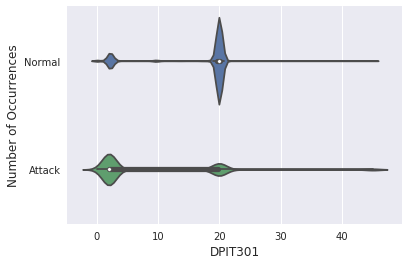

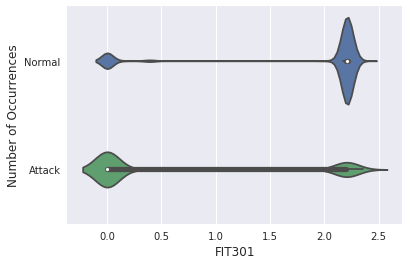

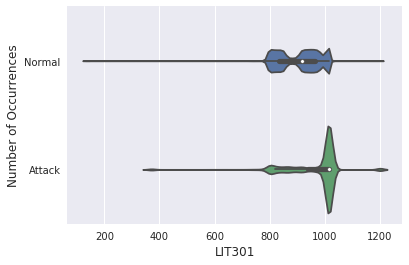

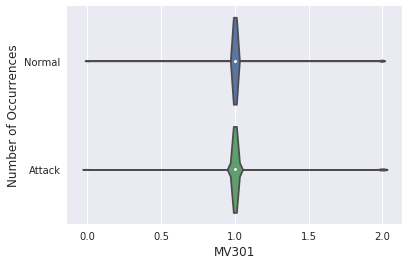

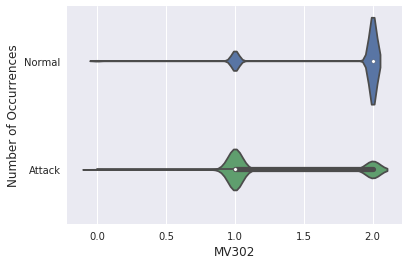

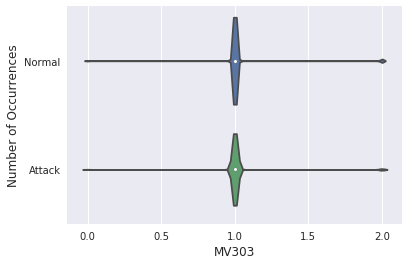

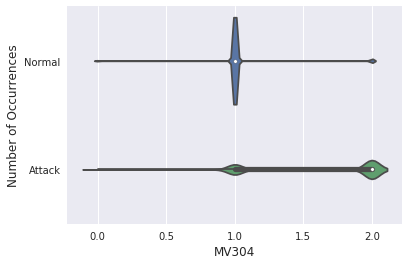

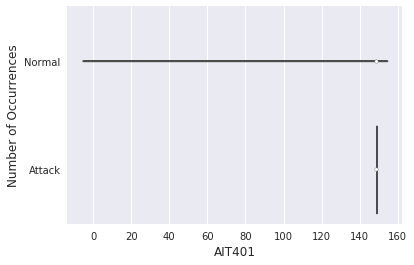

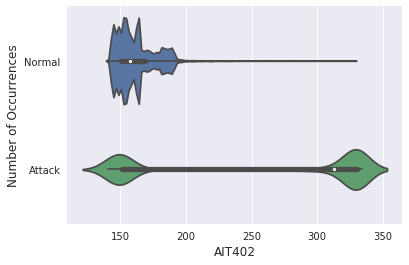

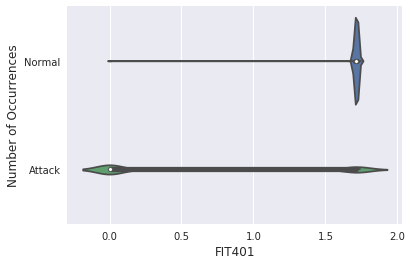

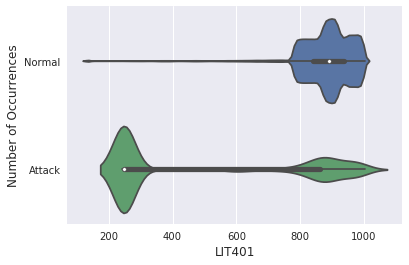

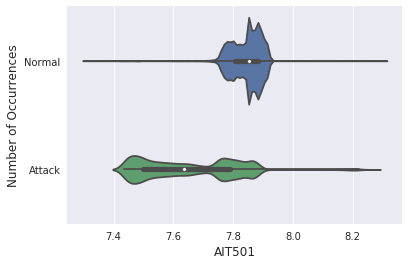

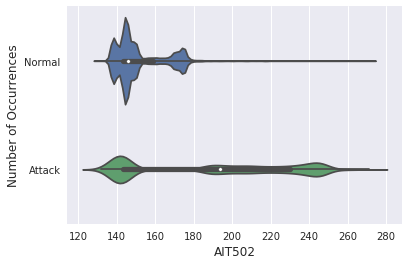

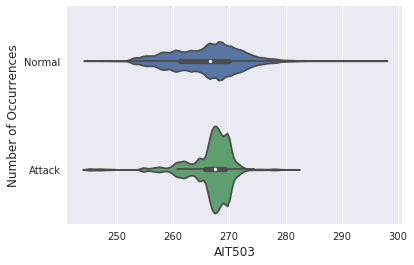

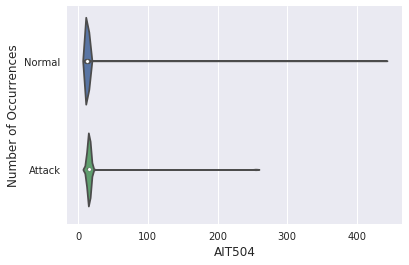

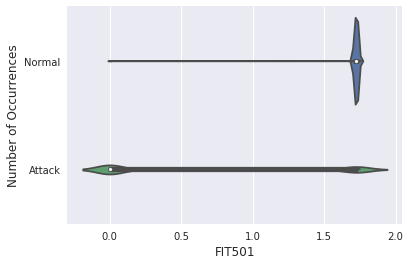

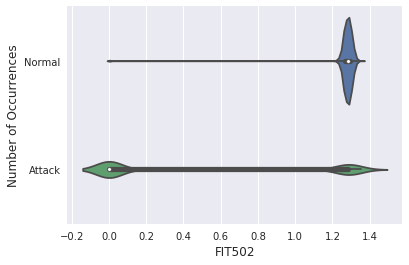

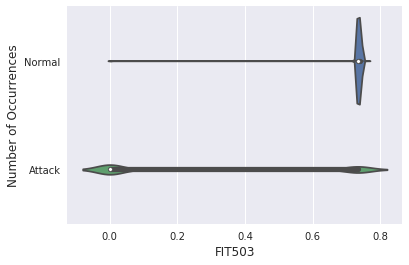

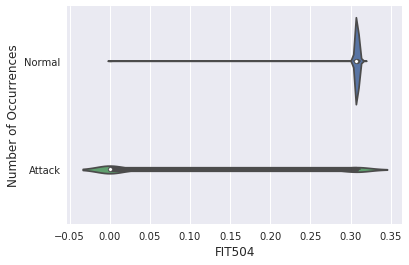

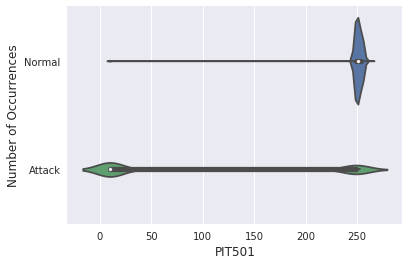

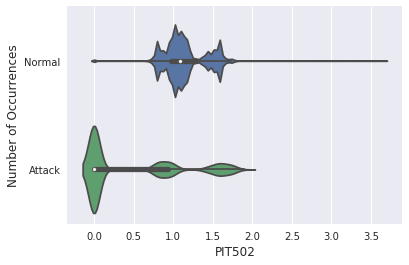

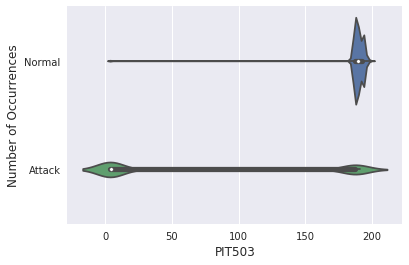

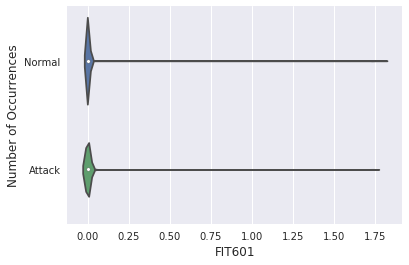

In [15]:
plt.figure(figsize=(12,6))
for i in NumFeatures[1:]:
    sns.violinplot(x=i, y='EVENT', data=pdata,split =True)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(i, fontsize=12)
    plt.show()

#### A general observation here, during attacks the distributions look rather squeezed. Attacks focus on a specific value range.

# Features with Correlation Higher Than .95!!

In [16]:
len(NumFeatures[1:])

31

In [17]:
data_cor = pdata[NumFeatures[1:]].corr()
# Set the threshold and add to pairs to list
t = 0.95
cor_list = []

#Find Pairs and update cor_list
for i in range(0,31):
    for j in range(i+1,31):
        if (data_cor.iloc[i,j] >= t and data_cor.iloc[i,j] < 1) or (data_cor.iloc[i,j] < 0 and data_cor.iloc[i,j] <= -t):
            cor_list.append([data_cor.iloc[i,j],i,j])

#Sort by corr coef
sorted_list = sorted(cor_list,key=lambda x: -abs(x[0]))

for v,i,j in sorted_list:
    print ("%s and %s = %.5f" % (NumFeatures[1:][i],NumFeatures[1:][j],v))

PIT501 and PIT503 = 0.99969
FIT503 and PIT501 = 0.99829
FIT501 and FIT502 = 0.99763
FIT503 and PIT503 = 0.99681
FIT501 and FIT503 = 0.99587
FIT501 and PIT501 = 0.99495
FIT503 and FIT504 = 0.99398
FIT501 and PIT503 = 0.99328
FIT502 and FIT503 = 0.99171
FIT401 and FIT503 = 0.99037
FIT502 and PIT501 = 0.99025
FIT401 and FIT501 = 0.98997
FIT401 and FIT502 = 0.98851
FIT502 and PIT503 = 0.98820
FIT504 and PIT501 = 0.98694
FIT401 and PIT501 = 0.98641
FIT401 and FIT504 = 0.98615
FIT501 and FIT504 = 0.98399
FIT401 and PIT503 = 0.98378
FIT504 and PIT503 = 0.98372
FIT502 and FIT504 = 0.97985
FIT201 and MV201 = 0.97444
FIT101 and MV101 = 0.96915
DPIT301 and FIT301 = 0.95311


In [18]:
#While finding corr we only used the NumFeat
#hi_corr_features = map(lambda x:x+1, hi_corr_features)

### Let's normalize the data so we can see what is happening here.

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


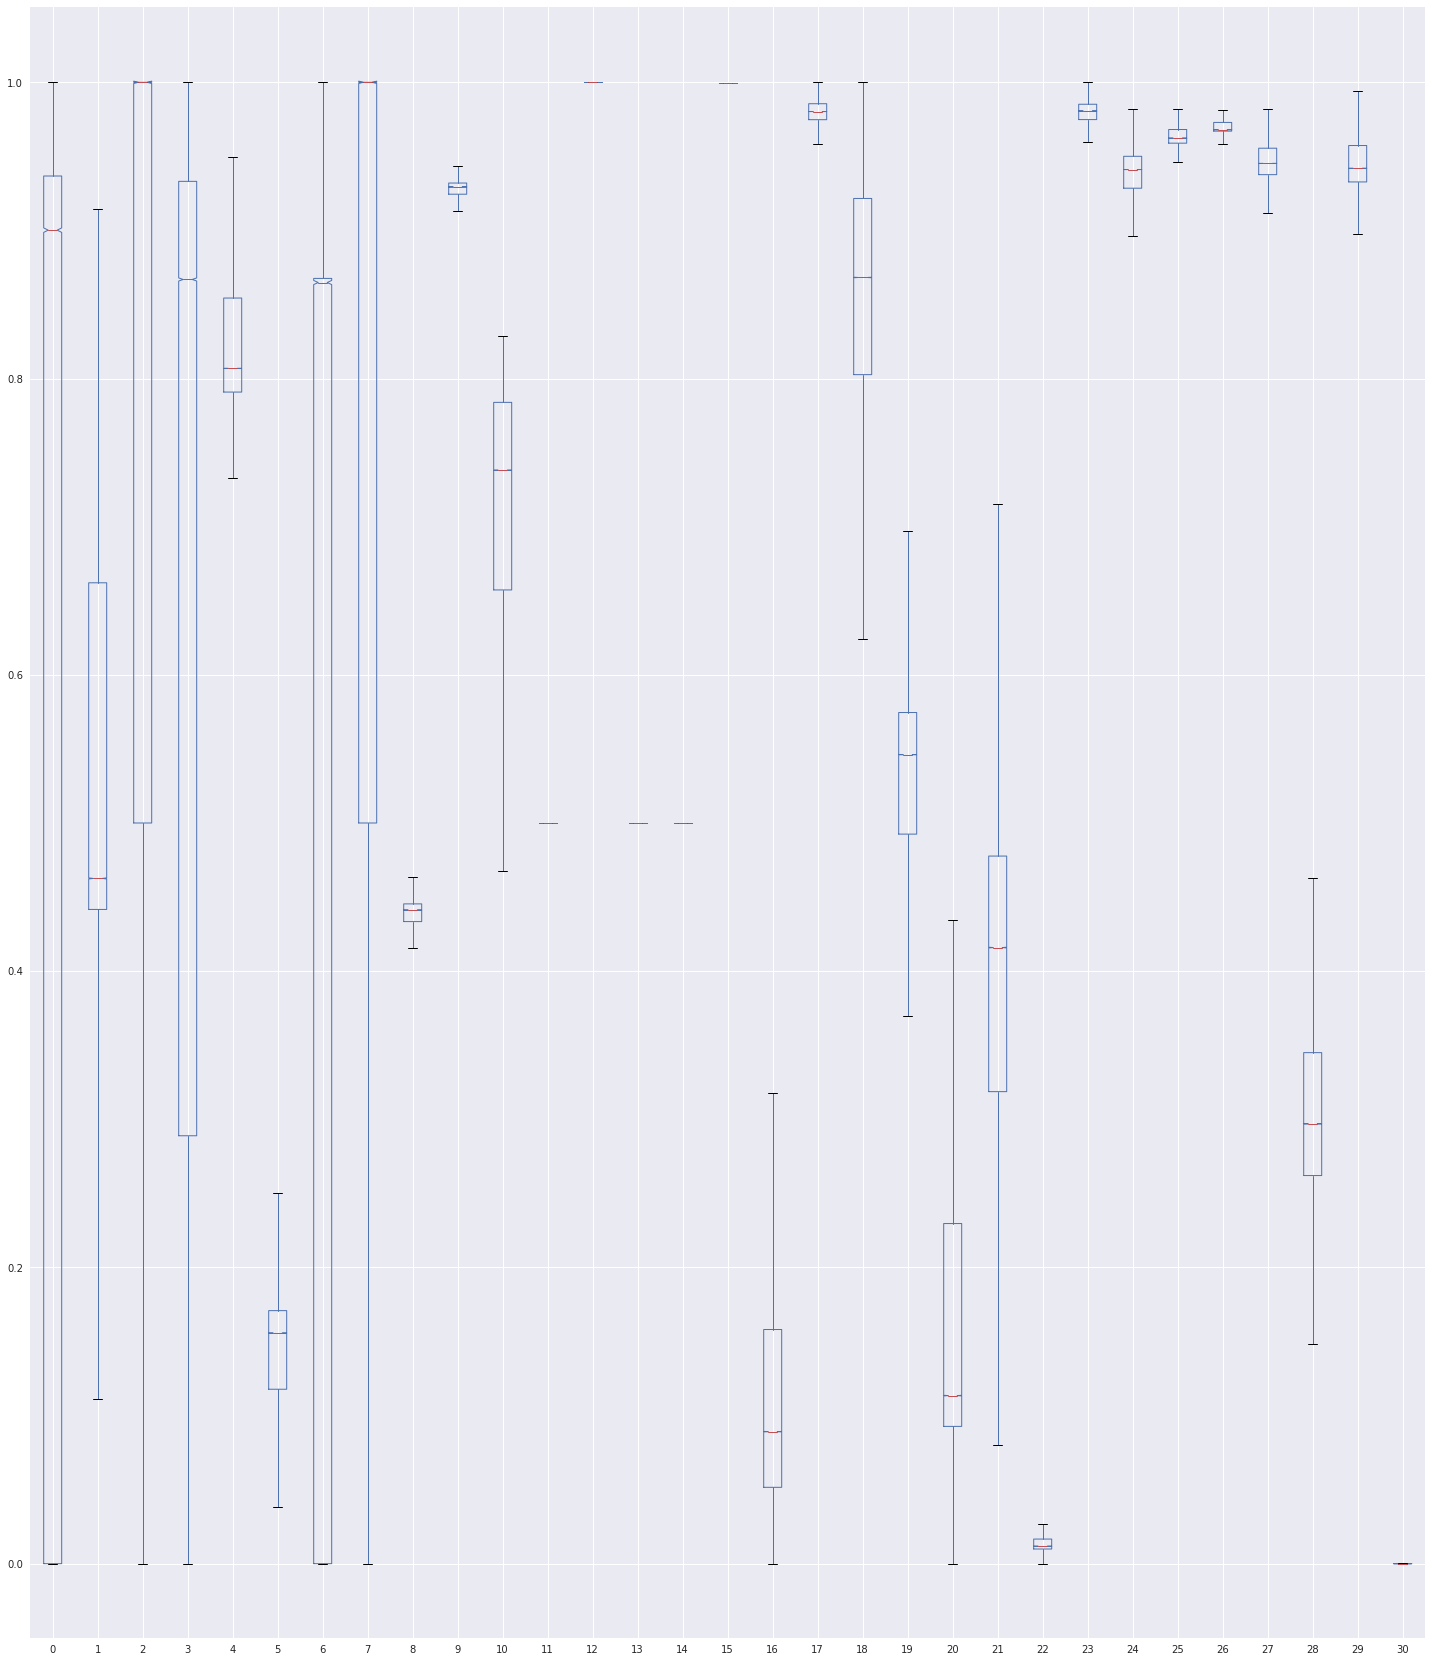

In [19]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(pdata[NumFeatures[1:]])
df_normalized = pd.DataFrame(np_scaled)
fig = plt.subplots(figsize=(25,  30))
df_normalized.boxplot(widths = 0.4, notch=True)

In [20]:
X_cat = pd.get_dummies(pdata , columns=catFeatures[1:])

In [21]:
X_cat.columns

Index(['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'AIT201', 'AIT202',
       'AIT203', 'FIT201', 'MV201', 'DPIT301', 'FIT301', 'LIT301', 'MV301',
       'MV302', 'MV303', 'MV304', 'AIT401', 'AIT402', 'FIT401', 'LIT401',
       'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503',
       'FIT504', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'EVENT', 'P102_1',
       'P102_2', 'P201_1', 'P201_2', 'P203_1', 'P203_2', 'P204_1', 'P204_2',
       'P205_1', 'P205_2', 'P206_1', 'P206_2', 'P301_1', 'P301_2', 'P302_1',
       'P302_2', 'P402_1', 'P402_2', 'P403_1', 'P403_2', 'UV401_1', 'UV401_2',
       'P501_1', 'P501_2', 'P602_1', 'P602_2'],
      dtype='object')

In [22]:
print(X_cat.columns)
dummies = ['P102_1', 'P102_2', 'P201_1', 'P201_2', 'P203_1', 'P203_2', 'P204_1',
'P204_2', 'P205_1', 'P205_2', 'P206_1', 'P206_2', 'P301_1', 'P301_2', 'P302_1', 'P302_2', 'P402_1', 'P402_2', 'P403_1', 'P403_2', 'UV401_1',
'UV401_2', 'P501_1', 'P501_2', 'P602_1', 'P602_2']

Index(['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'AIT201', 'AIT202',
       'AIT203', 'FIT201', 'MV201', 'DPIT301', 'FIT301', 'LIT301', 'MV301',
       'MV302', 'MV303', 'MV304', 'AIT401', 'AIT402', 'FIT401', 'LIT401',
       'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503',
       'FIT504', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'EVENT', 'P102_1',
       'P102_2', 'P201_1', 'P201_2', 'P203_1', 'P203_2', 'P204_1', 'P204_2',
       'P205_1', 'P205_2', 'P206_1', 'P206_2', 'P301_1', 'P301_2', 'P302_1',
       'P302_2', 'P402_1', 'P402_2', 'P403_1', 'P403_2', 'UV401_1', 'UV401_2',
       'P501_1', 'P501_2', 'P602_1', 'P602_2'],
      dtype='object')


In [23]:
y = pdata['EVENT'] == 'Attack'

### 80% training - 20%test data

In [24]:
from time import time
from sklearn.model_selection import train_test_split

X = X_cat[NumFeatures[1:] + dummies]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.20)

In [26]:
%%time
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def get_model(estimator, parameters, X_train, y_train, scoring):  
    model = GridSearchCV(estimator, param_grid=parameters, scoring=scoring)
    model.fit(X_train, y_train)
    return model.best_estimator_

from sklearn.model_selection import learning_curve
scoring = make_scorer(mean_absolute_error, greater_is_better=False)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import xgboost as XGB
xgb = XGB.XGBClassifier(seed=42, max_depth=3, objective='binary:logistic', n_estimators=400)
parameters = {'learning_rate':[0.1], 'reg_alpha':[3.0], 'reg_lambda': [4.0]}
clf_xgb1 = get_model(xgb, parameters, X_train, y_train, scoring)


CPU times: user 43min 34s, sys: 6.88 s, total: 43min 41s
Wall time: 11min 2s


In [27]:
%%time
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, clf_xgb1.predict(X_test)))
print (clf_xgb1)

0.998457833362
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=3.0, reg_lambda=4.0,
       scale_pos_weight=1, seed=42, silent=True, subsample=1)
CPU times: user 4.24 s, sys: 108 ms, total: 4.35 s
Wall time: 1.18 s


In [28]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, clf_xgb1.predict(X_test)))

[[178519     45]
 [   247  10533]]


In [29]:
from sklearn.metrics import classification_report
print (classification_report(y_test, clf_xgb1.predict(X_test)))
print (clf_xgb1)

             precision    recall  f1-score   support

      False       1.00      1.00      1.00    178564
       True       1.00      0.98      0.99     10780

avg / total       1.00      1.00      1.00    189344

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=3.0, reg_lambda=4.0,
       scale_pos_weight=1, seed=42, silent=True, subsample=1)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


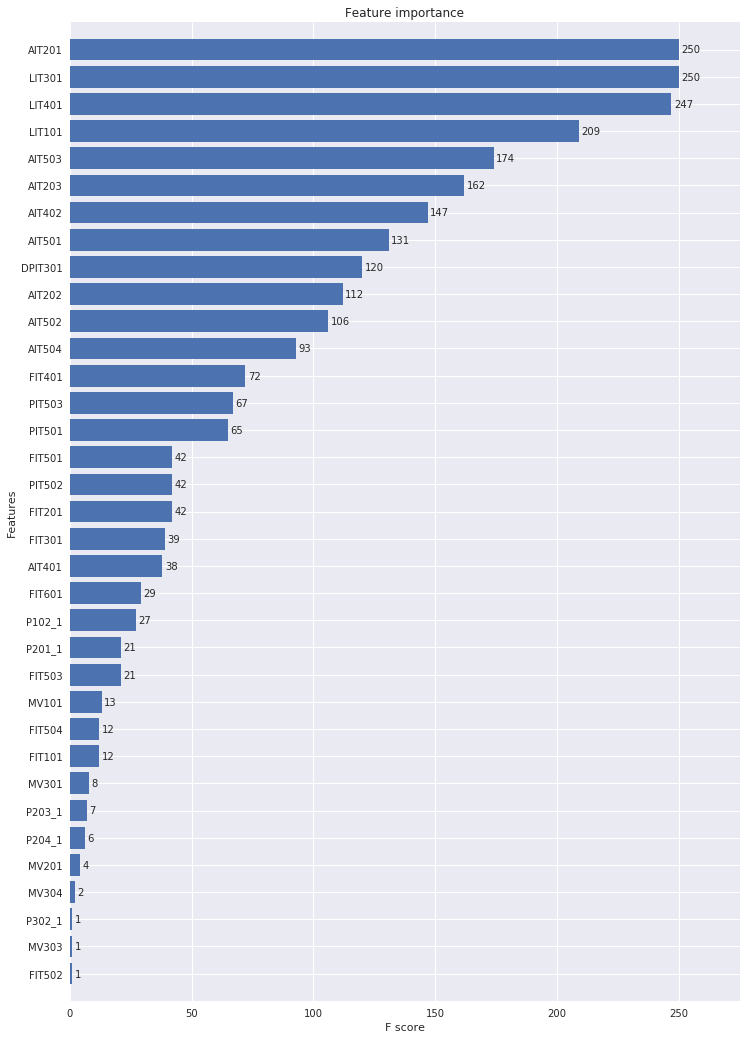

In [32]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(12,18))
plot_importance(clf_xgb1, height=0.8, ax=ax)
plt.show()

## Random Forest

In [34]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rclf = RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1)

rclf.fit(X_train, y_train)

print(rclf)
# make predictions
y_p = rclf.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, y_p))
print(metrics.confusion_matrix(y_test, y_p))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)
             precision    recall  f1-score   support

      False       1.00      1.00      1.00    178564
       True       1.00      1.00      1.00     10780

avg / total       1.00      1.00      1.00    189344

[[178555      9]
 [     5  10775]]
CPU times: user 40min 50s, sys: 1.52 s, total: 40min 52s
Wall time: 10min 17s


In [39]:
clf.fit


<bound method GaussianNB.fit of GaussianNB(priors=None)>

## Naive Bayes 

In [35]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
nbclf = GaussianNB()
nbclf.fit(X_train, y_train)

print(nbclf)
# make predictions
y_p = nbclf.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, y_p))
print(metrics.confusion_matrix(y_test, y_p))

GaussianNB(priors=None)
             precision    recall  f1-score   support

      False       0.98      1.00      0.99    178564
       True       0.99      0.71      0.82     10780

avg / total       0.98      0.98      0.98    189344

[[178461    103]
 [  3147   7633]]
CPU times: user 1.29 s, sys: 924 ms, total: 2.22 s
Wall time: 2.21 s


In [36]:
X_test.shape

(189344, 57)

In [38]:
X_test.columns

Index(['FIT101', 'LIT101', 'MV101', 'AIT201', 'AIT202', 'AIT203', 'FIT201',
       'MV201', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303',
       'MV304', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'AIT501', 'AIT502',
       'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P102_1', 'P102_2', 'P201_1', 'P201_2',
       'P203_1', 'P203_2', 'P204_1', 'P204_2', 'P205_1', 'P205_2', 'P206_1',
       'P206_2', 'P301_1', 'P301_2', 'P302_1', 'P302_2', 'P402_1', 'P402_2',
       'P403_1', 'P403_2', 'UV401_1', 'UV401_2', 'P501_1', 'P501_2', 'P602_1',
       'P602_2'],
      dtype='object')

In [41]:
%%time
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
# create the RFE model and select 5 attributes
rfe = RFE(model, 5)
rfe = rfe.fit(X,y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False  True False False False  True
 False  True False  True False False False False False False False False
 False False False False False False False False False]
[36 52 32 44  4 50 34 23 31 26 48 16 14 17 13 37 40  7 49 11 47 41 45 10  6
 46  1 39 22 38 33  1 12 28  9  1  2  1 24  1  5  3 25 51 53 29 15 20 27 43
 42 18  8 19 21 35 30]
CPU times: user 30min 12s, sys: 13.8 s, total: 30min 25s
Wall time: 30min 25s


In [56]:
rfe.ranking_ == True

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

In [59]:
[i for i, x in enumerate(rfe.ranking_) if x == True]

[26, 31, 35, 37, 39]

In [70]:
[ X.columns[x] for i, x in enumerate([26, 31, 35, 37, 39])]

['FIT504', 'P102_1', 'P203_1', 'P204_1', 'P205_1']

Object `sklearn.svm` not found.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, 5,  cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Cluster Analysis

In [76]:
%%time
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

      False       1.00      1.00      1.00    178564
       True       1.00      1.00      1.00     10780

avg / total       1.00      1.00      1.00    189344

[[178549     15]
 [     7  10773]]
CPU times: user 48.2 s, sys: 204 ms, total: 48.4 s
Wall time: 48.4 s



## Optimal number of clusters

In [77]:
%%time
from sklearn.cluster import KMeans
Ks = [2,4,6,8,10]
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(X).score(X) for i in range(len(km))]

CPU times: user 6min 20s, sys: 43.4 s, total: 7min 3s
Wall time: 4min 3s


In [103]:
[km[i].fit(X).score(X) for i in range(len(km))]

KeyboardInterrupt: 

In [106]:
newList = [x / 100000 for x in score]


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


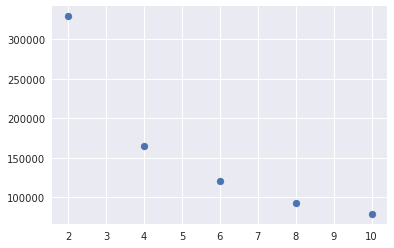

In [107]:
plt.scatter(Ks, [abs(i) for i in newList])

In [79]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init='k-means++', n_clusters=2)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

In [80]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h).astype(np.int8), np.arange(y_min, y_max, h).astype(np.int8),copy=False, sparse=True)

In [81]:
X_norm = (X - X.min())/(X.max() - X.min())

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


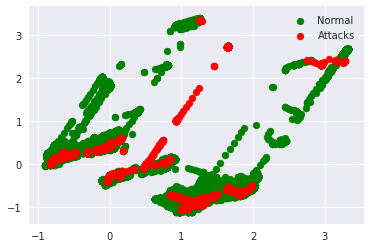

In [82]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

pca = PCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Normal', c='green')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Attacks', c='red')

plt.legend()
plt.show()

In [121]:
transformed

,0,1
0,0.926682,3.226392
1,0.927481,3.226801
2,0.928260,3.227502
3,0.928681,3.227928
4,0.928723,3.227929
5,0.928619,3.227498
6,0.926960,3.225463
7,0.925172,3.223988
8,0.923555,3.222186
9,0.921979,3.220323


## LDA

In [108]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=3) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X,y))


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [130]:
lda_transformed["y"] = y

In [177]:
len(lda_transformed[lda_transformed["y"])

SyntaxError: invalid syntax (<ipython-input-177-7a712b1177a4>, line 1)

In [176]:
plt.scatter(lda_transformed[lda_transformed["y"] == True], range(1,len(lda_transformed["y"]),color='red'))
#plt.plot(lda_transformed[lda_transformed["y"] == False],color='green')

TypeError: range() does not take keyword arguments

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


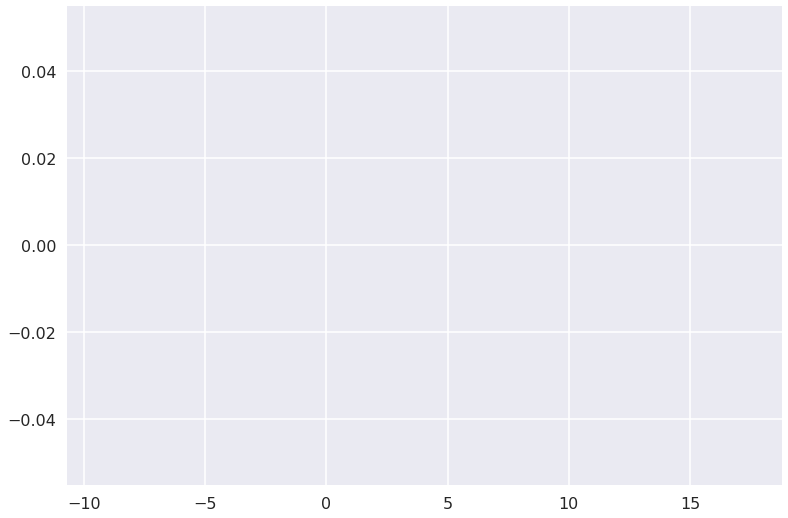

In [179]:
import numpy as np
import matplotlib.pyplot as pp
val = 0. # this is the value where you want the data to appear on the y-axis.
pp.plot(lda_transformed, np.zeros_like(lda_transformed) + val, 'x')
pp.show()

In [158]:
n_estimators = 100
forest = RandomForestClassifier(warm_start=True, oob_score=True)
kvs = {}
for i in range(1, 10):
    n_estimators = n_estimators + i*50
    forest.set_params(n_estimators=i)
    forest.fit(X, y)
    kvs[i] = forest.oob_score_

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


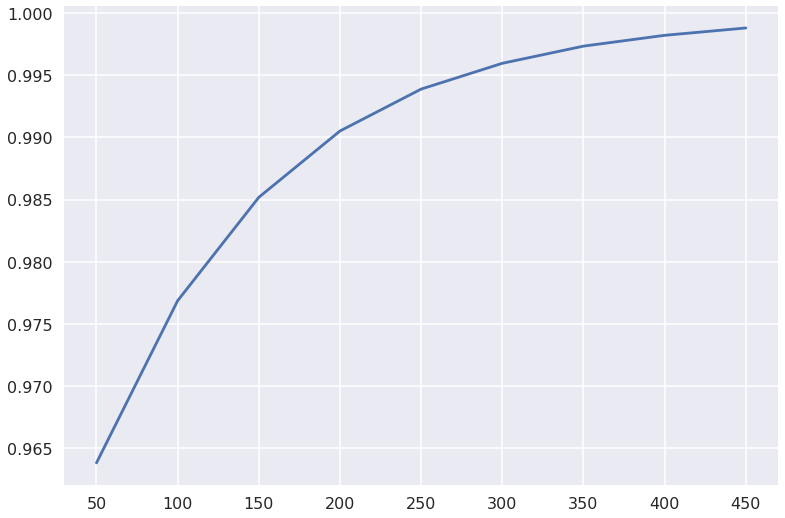

In [167]:
lists = sorted(kvs.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
x = [i * 50 for i in x]
plt.plot(x, y)
plt.show()

In [187]:
x, y = zip(*lists)

In [189]:
y

(0.96379495922232472,
 0.97685374435286498,
 0.98517828415823494,
 0.99051777771440097,
 0.99389259114901041,
 0.99596923691190309,
 0.99735190695443954,
 0.9982222813738818,
 0.99881379796961933)